# ⚙️ **Set-up**

Run the following commands in the terminal:

```terminal
pip install numpy
pip install pandas
pip install openpyxl
pip install datetime
pip install matplotlib
pip install missingno
```

Run the code below to import packages needed for notebook:

In [41]:
# Suppress all warnings (to keep notebook tidy)
import warnings
warnings.filterwarnings("ignore")

# Packages required
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import display, HTML
import missingno as msno
import matplotlib.pyplot as plt

# 📈 **Import raw data**

### ✅ **Coverage: 4.1**

⚠️ Ensure that the current working directory is in the main folder, e.g. named 'EC1B1'. 

- Inside the main folder, it contains a data folder named `data` 
- All the raw data are under the `data` folder, named `data_spain.xlsx` and `data_united_states.xlsx`
- This notebook is in the main folder as well

**Additional note:** We were unable to find the '_Exchange rates per US dollar (Period Average)_' data under the IMF database. Hence, we used exchange rate of USD per Peseta (Spain currency) instead.

In [2]:
# Import raw data
df_spain_raw = pd.read_excel('./data/data_spain.xlsx')
df_us_raw = pd.read_excel('./data/data_united_states.xlsx')

# Save them under new variables to keep raw data 'untouched'
df_spain = df_spain_raw
df_us = df_us_raw

We now take a quick inspect at the dataframe:

In [3]:
df_spain.head()

,International Financial Statistics (IFS),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,"Economic Activity, Industrial Production, Index","Exchange Rates, US Dollar per Domestic Currenc...","International Reserves and Liquidity, Reserves...","Prices, Consumer Price Index, All items, Index"
1,Jan 1960,NaN,0.016667,233,2.857368
2,Feb 1960,NaN,0.016667,253,2.855049
3,Mar 1960,NaN,0.016667,299,2.851573
4,Apr 1960,NaN,0.016667,326,2.853891


From raw data, we can tell that:
- Titles and headers are messy
- Years are not in `datetime` format
- Missing values
- Nominal exchange rate is currently not Perseta per US dollar, but the inverse

# 🧹 **Basic cleaning**

### ✅ **Coverage: 4.2, 5.1**

### **For Spain:**

In the code below, there are several steps that we took to clean the data. The steps are labeled as `#Step`, and the rationale for each step is explained afterwards.

In [4]:
# Step 1
df_spain = df_spain.rename(columns={
    'International Financial Statistics (IFS)': 'date', 
    'Unnamed: 1': 'spain_industrial_index', 
    'Unnamed: 2': 'spain_nominal_exchange_rate', 
    'Unnamed: 3': 'spain_reserves', 'Unnamed: 4': 'spain_price_index'}
    ) [1:]

# Step 2
df_spain['spain_nominal_exchange_rate'] = 1 / df_spain['spain_nominal_exchange_rate']

# Step 3
df_spain['date'] = df_spain['date'].apply(lambda x: datetime.strptime(x, '%b %Y'))

# Step 4
df_spain.iloc[:, 1:] = df_spain.iloc[:, 1:].apply(pd.to_numeric).round(2)

<u>Explanation of steps:</u>
- **Step 1:** We rename the columns to more appropriate names, as well as removing the first row (which is irrelevant) using `[1:]`
- **Step 2:** We take the inverse of the exchange rate, since we are looking for 'exchange rate per US dollar'
- **Step 3:** Convert the dates into `datetime` format, using the function `strptime()` to match the date format
- **Step 4:** For all values except for the date column, we ensure that all datapoints are `numeric` and rounded to two decimal places

The cleaned dataframe should look as such:

In [5]:
df_spain.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index
1,1960-01-01,NaN,60.0,233.0,2.86
2,1960-02-01,NaN,60.0,253.0,2.86
3,1960-03-01,NaN,60.0,299.0,2.85
4,1960-04-01,NaN,60.0,326.0,2.85
5,1960-05-01,NaN,60.0,360.0,2.85


Note that there are `NaN` values in `spain_industrial_index` as some early data are not available (will be looked through in detail later)

### **For US:**

We follow similar steps for the US:

In [6]:
# Similar to Step 1 for Spain
df_us = df_us.rename(columns={
    'International Financial Statistics (IFS)': 'date',
    'Unnamed: 1': 'us_reserves',
    'Unnamed: 2': 'us_price_index'}) [1:]

# Similar to Step 2 for Spain
df_us['date'] = df_us['date'].apply(lambda x: datetime.strptime(x, '%b %Y'))

# Similar to Step 3 for Spain
df_us.iloc[:, 1:] = df_us.iloc[:, 1:].apply(pd.to_numeric).round(2)

# Inspect the dataframe
df_us.head()

,date,us_reserves,us_price_index
1,1960-01-01,21478.1,13.44
2,1960-02-01,21395.7,13.48
3,1960-03-01,21344.7,13.48
4,1960-04-01,21278.0,13.53
5,1960-05-01,21234.3,13.53


---

### 🌟 **What was the Bretton Woods system? Did it have any clear advantages over the previous gold standard system?**

The Bretton Woods system was a system of fixed nominal exchange rates where participating countries fixed their exchange rates relative to the US dollar, which was pegged to gold at a fixed rate of $35 per ounce. Furthermore, with the exception of the United States, all other nations had to maintain adequate international reserves in US dollars, effectively making the US dollar the world’s primary reserve currency. This system was enforced by the IMF. The system had several clear advantages over the gold standard:

- By allowing member nations to adjust their exchange rates within a narrow band to correct imbalances in the balance of payments, it ensured states had greater flexibility to alleviate business cycle shocks and pursue full employment.
- By fixing exchange rates to the US dollar, countries could reduce uncertainty in trade and investment, facilitating international cooperation. This provided a stable framework for conducting transactions across borders, helping to stimulate economic growth and development in participating countries. 

---

### 🌟 **What disadvantages did it have and to what extent did the gold standard system suffer from similar issues?**

Difficulties arose due to the fundamental premise that both systems were pegged to a fixed currency: 
- Both systems were susceptible to speculative attacks from investors who anticipated currency devaluations or doubted Central Banks’ abilities to maintain fixed exchange rates. Such actions placed pressure on gold reserves and threatened attempts by monetary authorities to prevent a self-fulfilling prophecy where currencies were subsequently devalued.
- Both systems were vulnerable to instability. While the gold standard was tied to the convertibility of domestic currencies to gold, the Bretton Woods system was dependent on the convertibility of the US dollar to gold. Hence, any fluctuation in gold or the US dollar respectively would cause price instability in member states.

Further challenges specific to the Bretton Wood System became clear during its implementation after it became functional in December 1958: 
- As the US dollar became the key currency in the international economy, the demand for US dollars rose for foreign countries. In order to supply sufficient US dollars to fill the demand, the US had to run persistent and large trade deficits, which in turn threatened the stability of the US dollar and the Bretton Woods system itself, as countries had less faith that they could convert their US dollars into gold. However, restricting the issuance of the US dollar would cause an international deflationary spiral, leading to the Triffin Dilemma (Monnet and Puy, 2019). 
- Outside the United States, the appropriate level of gold reserves by central banks – the level ensuring the proper functioning of the international monetary system – was never defined or even discussed at the Bretton Woods conference (Monnet and Puy, 2019). This led to the ‘Gold Puzzle’, where foreign countries held more US dollars in total compared to the US, leading to a loss in faith in the system. This exacerbated the aforementioned ‘Triffin Dilemma’.


---

### 🌟 **The IMF was established during the Bretton Woods Conference in 1944. Briefly explain its role and how it contributed to the functioning of the Bretton Woods system.**

The International Monetary Fund provided reserve credit to countries with deficits in their balance of payments. Such borrowing was underpinned by the principle of conditionality, where lender nations had to provide assurance that funds obtained would be used strictly to resolve economic difficulties. Furthermore, the IMF was tasked with helping each nation set an adjustable and fixed exchange rate for their respective currencies based on gold, and subsequently ensuring that currency devaluations would not trigger declines in imports.

---

### 🌟 **What was the date that your country left the Bretton Woods system? Explain how you determined this.**

Spain left the Bretton Woods system in August 1971. Before August 1971, the nominal exchange rate was fixed at 70.0 peseta per US dollar. In September 1971, the nominal exchange rate of the peseta against the US dollar started to fall and continued to fall in the following months. This marked the end of the fixed nominal interest rate as the nominal rate of the peseta against the US dollar was highly variable in the following years. This suggests that Spain had left the Bretton Woods system in August 1971. 

---

### 🌟 **Describe the sense in which the departure from Bretton Woods represents a “natural experiment” about the effects of real exchange rate fluctuations on the macroeconomy.**

As the Nixon Shock or departure from the Bretton Woods system was sudden and unexpected, it led to a discontinuous change in real and nominal exchange volatility. While exchange rate volatility was changing discontinuously, other macroeconomic factors (e.g. global capital mobility) were changing continuously. Hence, this provided an ‘experimental’ setting where the discontinuous change in the exchange rate regime served as a ‘treatment’, while other variables acted as ‘controls’. In line with regression discontinuity design, the discontinuity in the exchange rate regime thus was a natural threshold with which researchers could isolate the effect of real exchange rate fluctuations on the macroeconomy.

# 🛠 **Data manipulation**

### ✅ **Coverage: 4.2, 4.3**

We first merge both datasets:

In [7]:
# Merge based on 'date'
merged_df = pd.merge(df_spain, df_us, on = 'date')

# Inspect the new dataframe, tail() to show industrial index as well
merged_df.tail()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index
367,1990-08-01,57.14,97.03,53227.72,52.2,78908.84,60.35
368,1990-09-01,97.8,98.47,53790.19,52.75,80024.17,60.86
369,1990-10-01,100.91,95.7,55428.04,53.22,82852.2,61.22
370,1990-11-01,104.11,93.96,56347.86,53.17,83059.4,61.36
371,1990-12-01,88.2,95.23,56004.84,53.3,83316.21,61.36


We then create the lag variables based by requirements, `shift(1)` for monthly change and `shift(12)` for yearly:

In [8]:
# For Spain
merged_df['spain_nominal_exchange_rate_lag_1'] = merged_df['spain_nominal_exchange_rate'].shift(1)
merged_df['spain_price_index_lag_1'] = merged_df['spain_price_index'].shift(1)
merged_df['spain_industrial_index_lag_1'] = merged_df['spain_industrial_index'].shift(1)
merged_df['spain_industrial_index_lag_12'] = merged_df['spain_industrial_index'].shift(12)

# For US
merged_df['us_price_index_lag_1'] = merged_df['us_price_index'].shift(1)

# Data inspection
merged_df.tail()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,spain_industrial_index_lag_12,us_price_index_lag_1
367,1990-08-01,57.14,97.03,53227.72,52.2,78908.84,60.35,100.56,51.97,99.59,57.33,59.8
368,1990-09-01,97.8,98.47,53790.19,52.75,80024.17,60.86,97.03,52.2,57.14,100.16,60.35
369,1990-10-01,100.91,95.7,55428.04,53.22,82852.2,61.22,98.47,52.75,97.8,102.42,60.86
370,1990-11-01,104.11,93.96,56347.86,53.17,83059.4,61.36,95.7,53.22,100.91,103.92,61.22
371,1990-12-01,88.2,95.23,56004.84,53.3,83316.21,61.36,93.96,53.17,104.11,88.58,61.36


**<u>We create the rates of change, using the formulas:</u>**

For rate of change:

$$\text{Rate of Change (\%)} = \frac{{\text{Original Value} - \text{Lagged Value}}}{{\text{Lagged Value}}} \times 100$$

For real exchange rate:

$$\text{US to Spain Real Exchange Rate} = \text{US to Spain Nominal Exchange Rate} \times \frac{\text{US Price Level}}{{\text{Spain Price Level}}}$$

Finally, we apply these formulas to our code as such:

In [9]:
# Real exchange rate parts
merged_df['spain_real_exchange_rate'] = merged_df['spain_nominal_exchange_rate'] * merged_df['us_price_index'] / merged_df['spain_price_index']
merged_df['spain_real_exchange_rate_lag_1'] = merged_df['spain_real_exchange_rate'].shift(1)

# Applying rate of change formula
merged_df['spain_nominal_exchange_rate_growth'] = (merged_df['spain_nominal_exchange_rate'] - merged_df['spain_nominal_exchange_rate_lag_1']) / merged_df['spain_nominal_exchange_rate_lag_1'] * 100
merged_df['spain_real_exchange_rate_growth'] = (merged_df['spain_real_exchange_rate'] - merged_df['spain_real_exchange_rate_lag_1']) / merged_df['spain_real_exchange_rate_lag_1'] * 100
merged_df['spain_inflation_rate'] = (merged_df['spain_price_index'] - merged_df['spain_price_index_lag_1']) / merged_df['spain_price_index_lag_1'] * 100
merged_df['spain_industrial_growth'] = (merged_df['spain_industrial_index'] - merged_df['spain_industrial_index_lag_1']) / merged_df['spain_industrial_index_lag_1'] * 100
merged_df['spain_industrial_yearly_growth'] = (merged_df['spain_industrial_index'] - merged_df['spain_industrial_index_lag_12']) / merged_df['spain_industrial_index_lag_12'] * 100
merged_df['us_inflation_rate'] = (merged_df['us_price_index'] - merged_df['us_price_index_lag_1']) / merged_df['us_price_index_lag_1'] * 100

# Inspect the final output
merged_df.tail()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,spain_industrial_index_lag_12,us_price_index_lag_1,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate
367,1990-08-01,57.14,97.03,53227.72,52.2,78908.84,60.35,100.56,51.97,99.59,57.33,59.8,112.17932,115.710756,-3.510342,-3.051952,0.442563,-42.624762,-0.331415,0.919732
368,1990-09-01,97.8,98.47,53790.19,52.75,80024.17,60.86,97.03,52.2,57.14,100.16,60.35,113.609179,112.17932,1.484077,1.274619,1.05364,71.158558,-2.35623,0.84507
369,1990-10-01,100.91,95.7,55428.04,53.22,82852.2,61.22,98.47,52.75,97.8,102.42,60.86,110.085569,113.609179,-2.81304,-3.101519,0.890995,3.179959,-1.474321,0.591522
370,1990-11-01,104.11,93.96,56347.86,53.17,83059.4,61.36,95.7,53.22,100.91,103.92,61.22,108.433056,110.085569,-1.818182,-1.501117,-0.09395,3.171143,0.182833,0.228683
371,1990-12-01,88.2,95.23,56004.84,53.3,83316.21,61.36,93.96,53.17,104.11,88.58,61.36,109.630634,108.433056,1.351639,1.10444,0.244499,-15.281913,-0.428991,0.0


Finally, we create the reserve indexes. The index formula is as such:

$$\text{Index} = \frac{{\text{Current Value}}}{{\text{Index Value}}} \times 100$$

The 'Index Value' will be the first value of the reserve columns. The code is as such: 

In [10]:
# We first create empty lists for the indexes
spain_index_list = []
us_index_list = []

# We identify the initial values as the 'Index Value'
spain_first_value = merged_df.loc[0, 'spain_reserves']
us_first_value = merged_df.loc[0, 'us_reserves']

# For Spain – create a loop to calculate the index values for each value
for value in merged_df['spain_reserves']:
    if value != None: # Ensure that empty data, if any, is taken into consideration
        index = value / spain_first_value * 100 # Formula of index as above
    else:
        index = None

    spain_index_list.append(index)

# Similarly for US:
for value in merged_df['us_reserves']:
    if value != None:
        index = value / us_first_value * 100
    else:
        index = None

    us_index_list.append(index)

# Add new columns to the original dataframe
merged_df['spain_reserves_index_1960'] = spain_index_list
merged_df['us_reserves_index_1960'] = us_index_list

# Round all numeric values to two decimal places
merged_df = merged_df.round(2)

# Save as new variable
df = merged_df

# Finally, inspect the output
df.tail()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
367,1990-08-01,57.14,97.03,53227.72,52.2,78908.84,60.35,100.56,51.97,99.59,...,112.17932,115.710756,-3.510342,-3.051952,0.442563,-42.624762,-0.331415,0.919732,22844.52,367.39
368,1990-09-01,97.8,98.47,53790.19,52.75,80024.17,60.86,97.03,52.2,57.14,...,113.609179,112.17932,1.484077,1.274619,1.05364,71.158558,-2.35623,0.84507,23085.92,372.58
369,1990-10-01,100.91,95.7,55428.04,53.22,82852.2,61.22,98.47,52.75,97.8,...,110.085569,113.609179,-2.81304,-3.101519,0.890995,3.179959,-1.474321,0.591522,23788.86,385.75
370,1990-11-01,104.11,93.96,56347.86,53.17,83059.4,61.36,95.7,53.22,100.91,...,108.433056,110.085569,-1.818182,-1.501117,-0.09395,3.171143,0.182833,0.228683,24183.63,386.72
371,1990-12-01,88.2,95.23,56004.84,53.3,83316.21,61.36,93.96,53.17,104.11,...,109.630634,108.433056,1.351639,1.10444,0.244499,-15.281913,-0.428991,0.0,24036.41,387.91


Lastly, we print the full dataframe. As there is a significant number of rows, we use the `IPython` package to create a dropdown button instead.

In [46]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create dropdown button
html_code = f'''
<details>
<summary style="font-size: 20px; font-weight: bold;">Click to open full dataframe</summary>
{df.to_html()}
</details>
'''

# Display the HTML code
display(HTML(html_code))

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,spain_industrial_index_lag_12,us_price_index_lag_1,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960,us_minus_spain_inflation
0,1960-01-01,NaN,60.0,233.0,2.86,21478.1,13.44,None,None,None,None,None,281.958042,None,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00,NaN
1,1960-02-01,NaN,60.0,253.0,2.86,21395.7,13.48,60.0,2.86,NaN,None,13.44,282.797203,281.958042,0.0,0.297619,0.0,NaN,NaN,0.297619,108.58,99.62,0.297619
2,1960-03-01,NaN,60.0,299.0,2.85,21344.7,13.48,60.0,2.86,NaN,None,13.48,283.789474,282.797203,0.0,0.350877,-0.34965,NaN,NaN,0.0,128.33,99.38,0.34965
3,1960-04-01,NaN,60.0,326.0,2.85,21278.0,13.53,60.0,2.85,NaN,None,13.48,284.842105,283.789474,0.0,0.37092,0.0,NaN,NaN,0.37092,139.91,99.07,0.37092
4,1960-05-01,NaN,60.0,360.0,2.85,21234.3,13.53,60.0,2.85,NaN,None,13.53,284.842105,284.842105,0.0,0.0,0.0,NaN,NaN,0.0,154.51,98.86,0.0
5,1960-06-01,NaN,60.0,406.0,2.84,21169.8,13.57,60.0,2.85,NaN,None,13.53,286.690141,284.842105,0.0,0.648793,-0.350877,NaN,NaN,0.295639,174.25,98.56,0.646517
6,1960-07-01,NaN,60.0,427.0,2.84,20999.4,13.57,60.0,2.84,NaN,None,13.57,286.690141,286.690141,0.0,0.0,0.0,NaN,NaN,0.0,183.26,97.77,0.0
7,1960-08-01,NaN,60.0,455.0,2.85,20803.4,13.57,60.0,2.84,NaN,None,13.57,285.684211,286.690141,0.0,-0.350877,0.352113,NaN,NaN,0.0,195.28,96.86,-0.352113
8,1960-09-01,NaN,60.0,479.0,2.86,20430.0,13.57,60.0,2.85,NaN,None,13.57,284.685315,285.684211,0.0,-0.34965,0.350877,NaN,NaN,0.0,205.58,95.12,-0.350877
9,1960-10-01,NaN,60.0,527.0,2.87,20068.2,13.67,60.0,2.86,NaN,None,13.57,285.783972,284.685315,0.0,0.38592,0.34965,NaN,NaN,0.73692,226.18,93.44,0.387269


In [47]:
# NOT FINISHED, find a way to convert dtypes() to NUMERIC and convert to 2 d.p.

# 🔎 **Inspection & fine-tuning**

### ✅ **Coverage: 4.2, 5.2**

### **Any missing values?**

Firstly, we utilise the `missingno` package to elegantly visualise any missing values:

<Axes: >

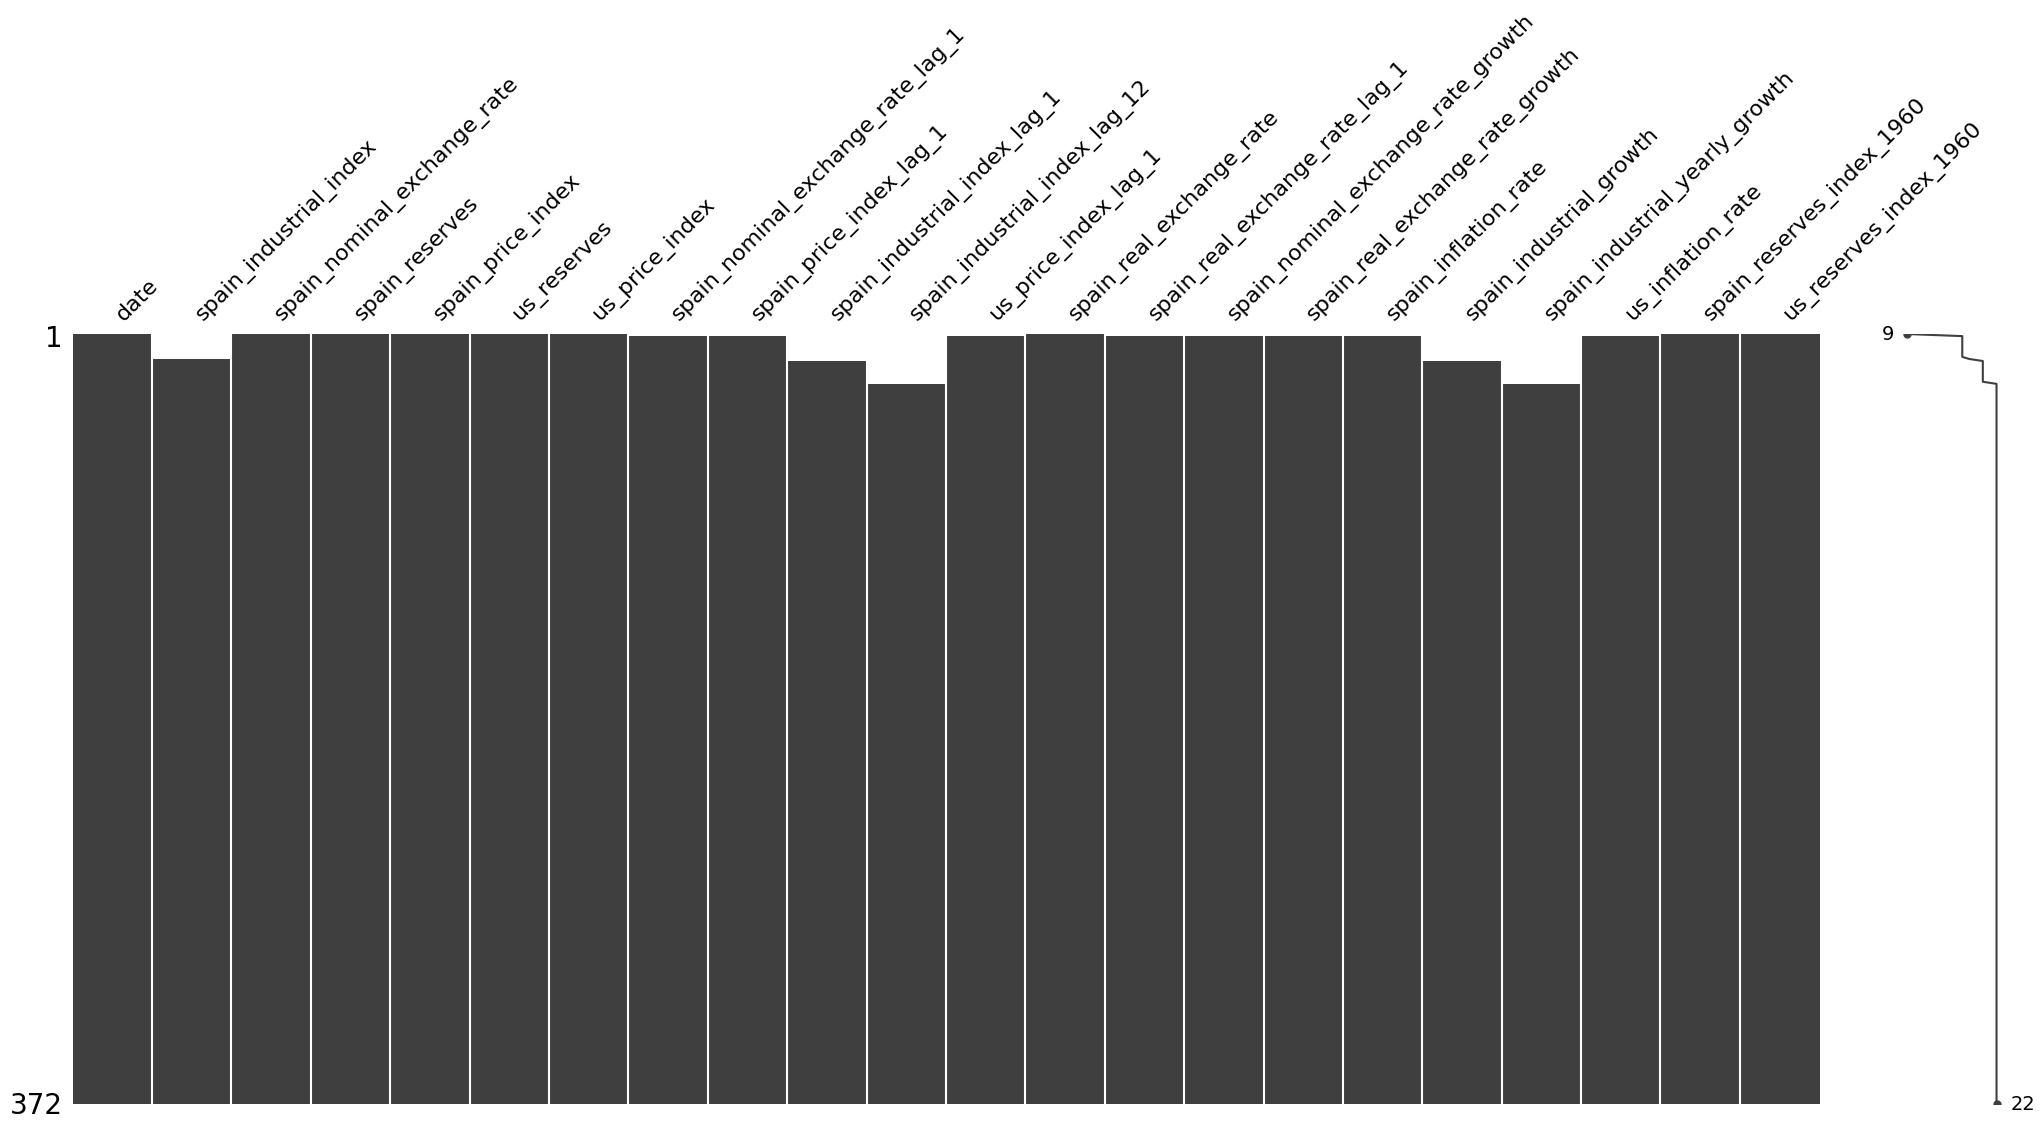

In [12]:
msno.matrix(df)

From the graph above, we can see that:
- Some variables have initial missing values
- There are no missing values in between
- On a closer inspection, only `_industrial_` columns have initial missing values

Since the values were missing in the raw data to begin with, we will leave the dataframe unchanged.

### **Any outliers?**

There are multiple ways to identify potential outliers. Before we decide on the method, we first ran the following code to plot each of the variables using histograms:

```python
for item in df.columns[1:]: # All variables except for 'date'
    plt.figure()
    plt.hist(df[item], bins=50, edgecolor='white')
    plt.title(str(item))
```
<u>Some observations:</u>
- Only a few distributions seem to be normal
- Some have some form of skewed distribution, some seems to have a uniform distribution for a certain range of values, others have distributions that seem very random

Therefore, in this case, the method of using standard deviation (considering values beyond a certain standard deviation as outliers) may not be appropriate. The method that we use is simply an empirical way of spotting extreme outliers ourselves from the distributions (there are not many of them).

<u>Variables that have outliers:</u>
- `spain_nominal_exchange_rate_growth`
- `spain_real_exchange_rate_growth`
- `spain_industrial_yearly_growth`
- `spain_inflation_rate`

For visualisation, we plot these variables:

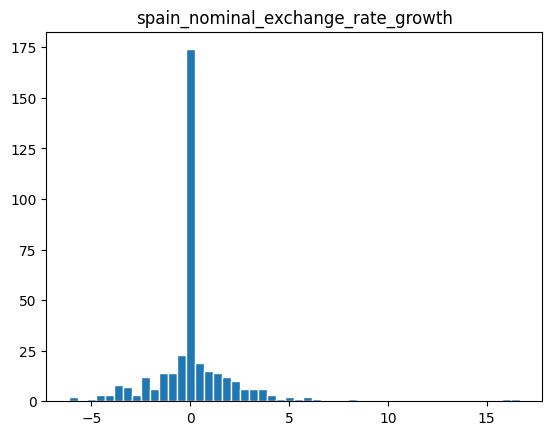

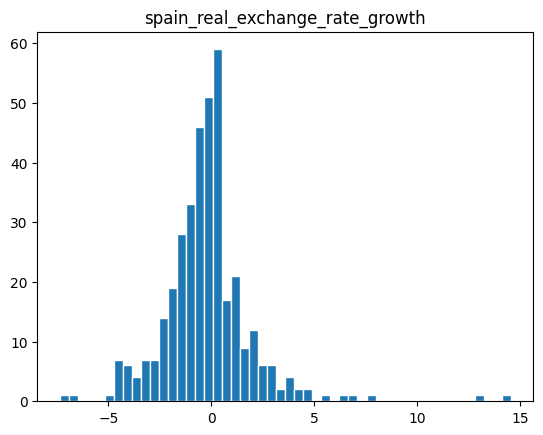

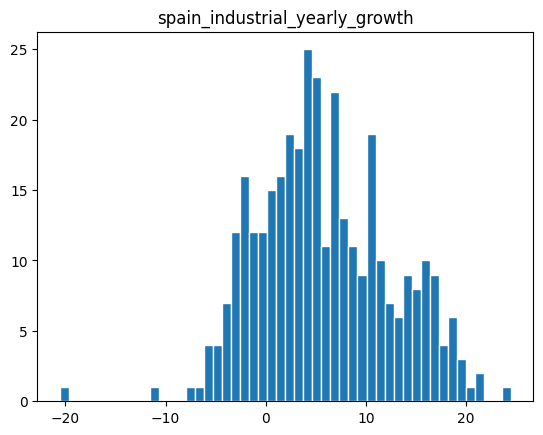

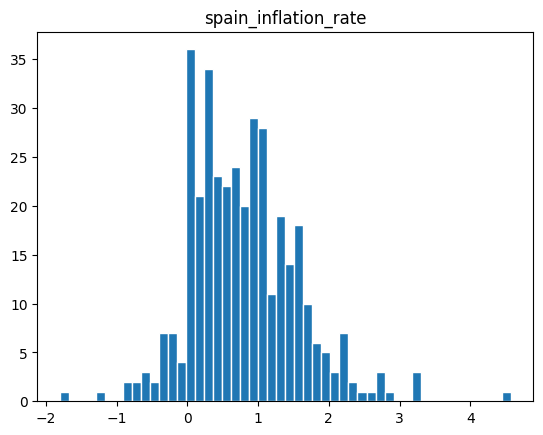

In [13]:
# Identify variables to inspect
factors_to_inspect = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_industrial_yearly_growth', 'spain_inflation_rate']

# Plot each of the variable
for factor in factors_to_inspect:
    plt.figure()
    plt.hist(df[factor], bins=50, edgecolor='white')
    plt.title(str(factor))

To identify where the outliers exist in the dataframe, we build a custom function as such:

In [14]:
def determine_outlier_year(df, column_name, value, greater=True):
    '''
    parameters:
    df: the dataframe to inspect
    column_name: the variable to inspect
    value: the threshold value, determined empirically from histogram distribution, of outliers
    greater: set as 'True' for default (whether outliers are greater than/less than the threshold value)
    '''
    if greater:
        df_filtered = df[df[column_name] > value]
    else:
        df_filtered = df[df[column_name] <= value]

# We are only interested in the outlier rows
    return df_filtered

We first start with `spain_nominal_exchange_rate_growth` and `spain_real_exchange_rate_growth` (since they are closely correlated):

In [15]:
determine_outlier_year(df, 'spain_nominal_exchange_rate_growth', 15)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
94,1967-11-01,37.19,70.0,1032.01,4.69,15437.6,15.5,60.0,4.59,35.99,...,231.343284,201.960784,16.666667,14.548616,2.178649,3.33426,1.639792,0.323625,442.92,71.88
210,1977-07-01,71.54,80.52,4634.96,13.49,18926.99,27.97,69.31,13.06,77.19,...,166.949177,147.748116,16.173712,12.995807,3.292496,-7.319601,-3.558911,0.466954,1989.25,88.12


In [16]:
determine_outlier_year(df, 'spain_real_exchange_rate_growth', 10)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
94,1967-11-01,37.19,70.0,1032.01,4.69,15437.6,15.5,60.0,4.59,35.99,...,231.343284,201.960784,16.666667,14.548616,2.178649,3.33426,1.639792,0.323625,442.92,71.88
210,1977-07-01,71.54,80.52,4634.96,13.49,18926.99,27.97,69.31,13.06,77.19,...,166.949177,147.748116,16.173712,12.995807,3.292496,-7.319601,-3.558911,0.466954,1989.25,88.12


The outliers are in years 1967 and 1977. Upon further research:
- **(1959)** Spanish peseta's nominal exchange rate changed from 60 to 70 USD. This adjustment was part of Spain's efforts to stabilize its currency and manage its exchange rate within the framework of the Bretton Woods system.
  - <u>Classify as outlier</u> (one-time increase, endogenously influenced by policy)
- **(1977)** Spain was transitioning from the dictatorship of Francisco Franco to a democratic system. Uncertainty around Spain's political transition had an economic spillover effect, including high inflation rates and an unstable exchange rate.
  - <u>Do not classify as outlier</u> (natural exogenous events)

Now we inspect `spain_industrial_yearly_growth`:

In [17]:
determine_outlier_year(df, 'spain_industrial_yearly_growth', -15, greater=False)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
187,1975-08-01,46.41,58.33,6485.82,9.27,16116.68,24.9,57.25,9.12,66.46,...,156.679288,156.056469,1.886463,0.399098,1.644737,-30.168522,-20.544427,0.160901,2783.61,75.04


# Explain why (unfinished)

Finally, we inspect `spain_inflation_rate`:

In [18]:
determine_outlier_year(df, 'spain_inflation_rate', 4)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
196,1976-05-01,74.84,67.63,5528.04,10.75,17955.33,25.91,67.27,10.28,73.42,...,163.004028,168.371313,0.535157,-3.187767,4.571984,1.934078,6.579322,0.699572,2372.55,83.6


# Explain why (unfinished)

# 📊 **Graphic visualisation**

### ✅ **Coverage: 5.3.1, 5.3.2**

According to [US Department of State](https://history.state.gov/milestones/1969-1976/nixon-shock#:~:text=On%20August%2015%2C%201971%2C%20President%20Richard%20M.), the end of Bretton Woods system is **August 15, 1971**. Hence we create a variable `bw_year` for this date:

In [19]:
bw_year = datetime(1971, 8, 15)

Now we proceed to plot the necessary graphs. Note that we used `matplotlib` package and a `Solarize_Light2` theme. The codes are all strictly within the [Matplotlib Documentation](https://matplotlib.org/stable/index.html) and they are self-explanatory.

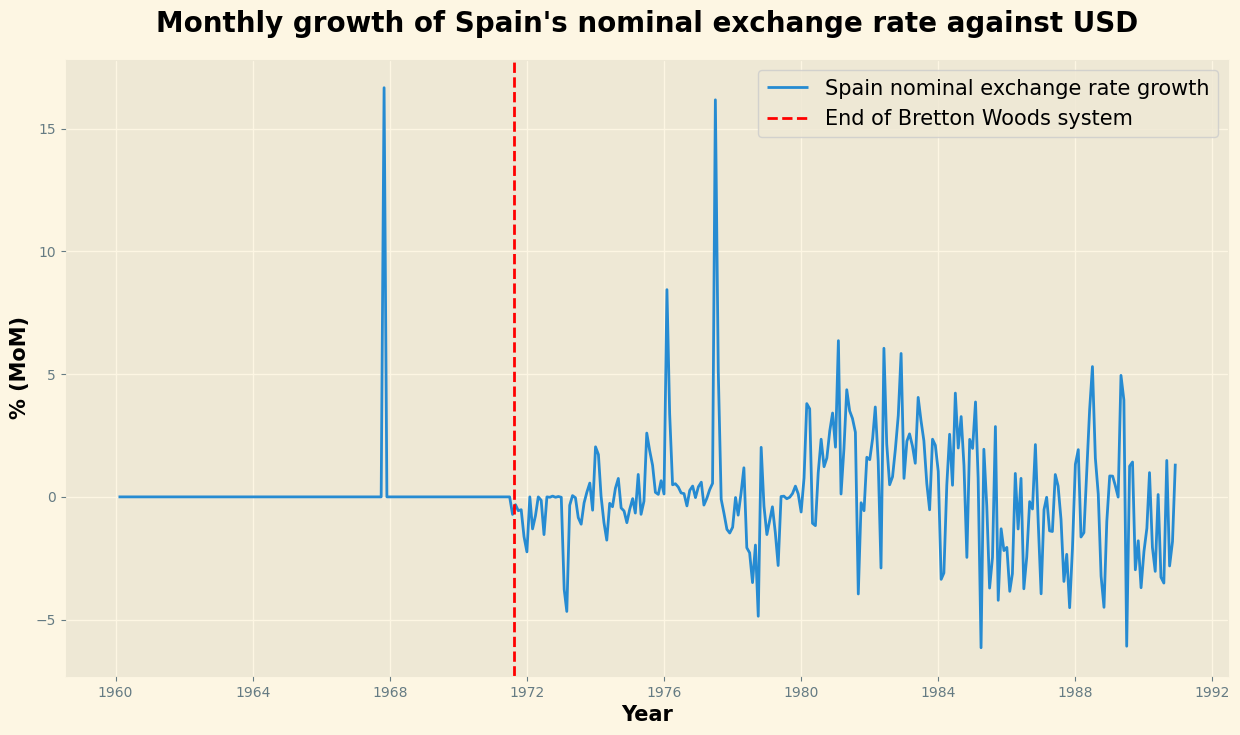

In [48]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_nominal_exchange_rate_growth'], label='Spain nominal exchange rate growth')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('% (MoM)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Monthly growth of Spain's nominal exchange rate against USD", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

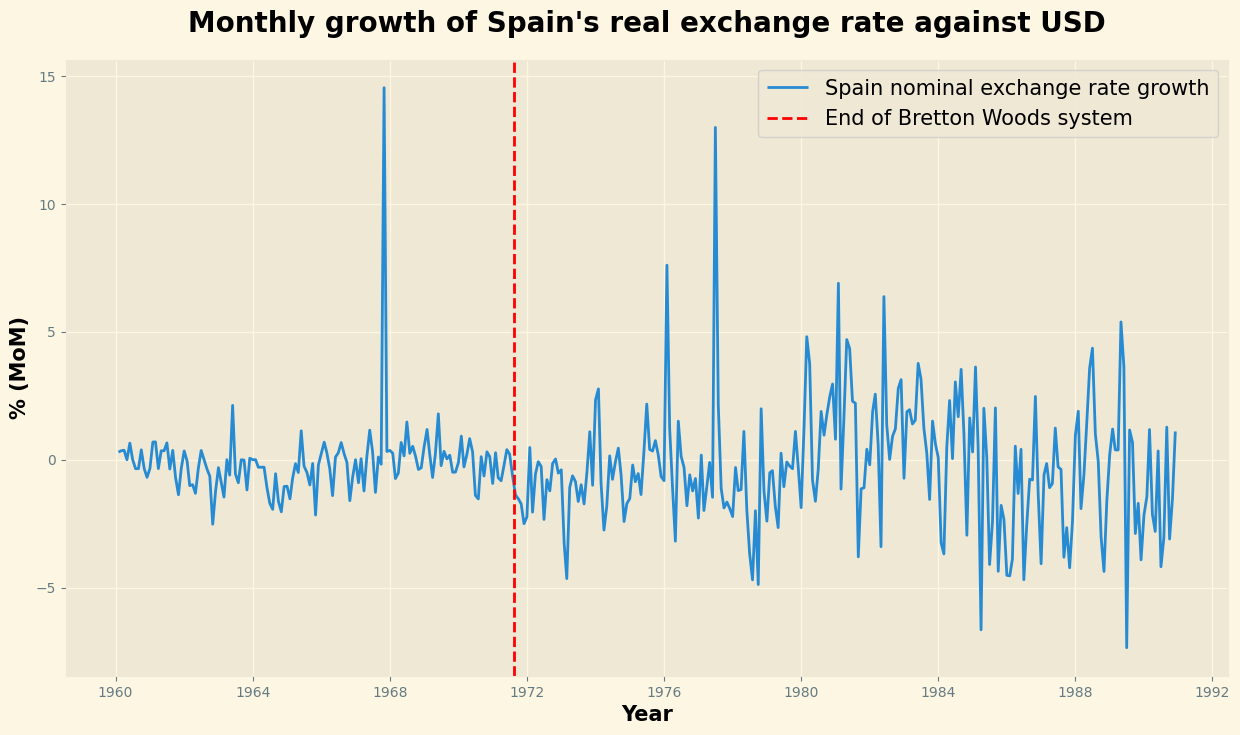

In [21]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_real_exchange_rate_growth'], label='Spain nominal exchange rate growth')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('% (MoM)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Monthly growth of Spain's real exchange rate against USD", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

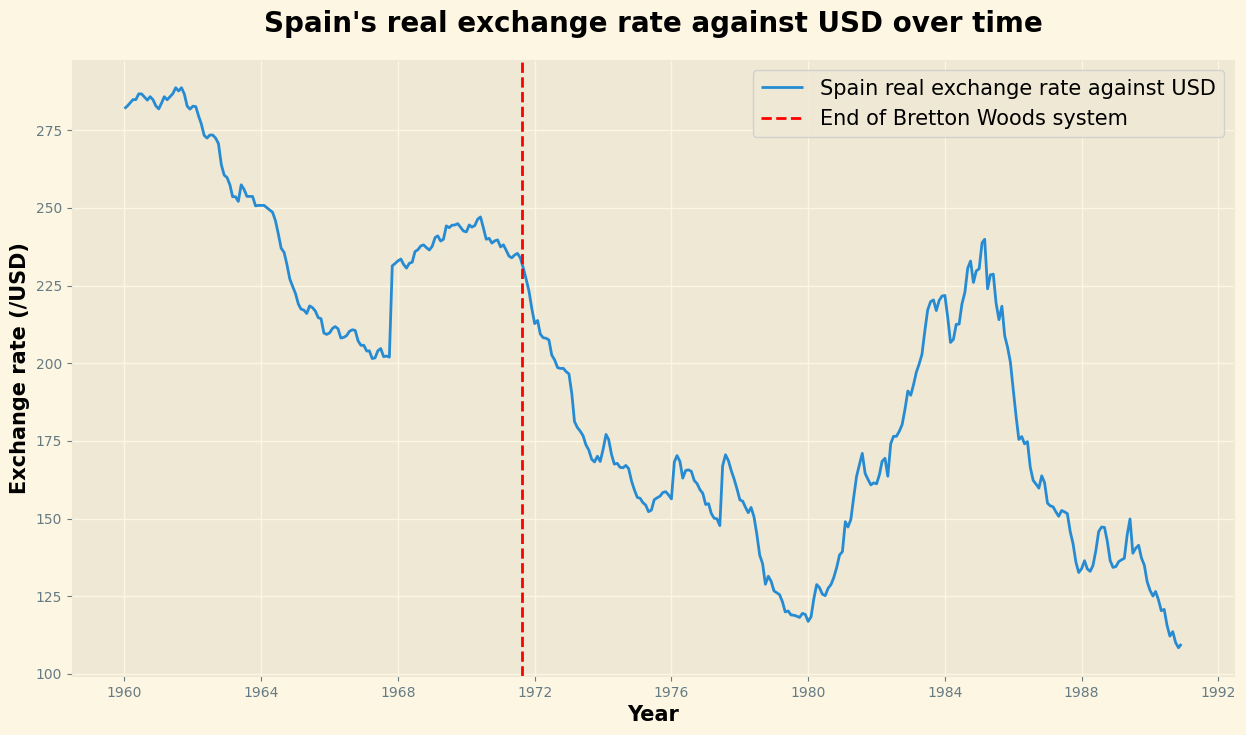

In [22]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_real_exchange_rate'], label='Spain real exchange rate against USD')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('Exchange rate (/USD)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Spain's real exchange rate against USD over time", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

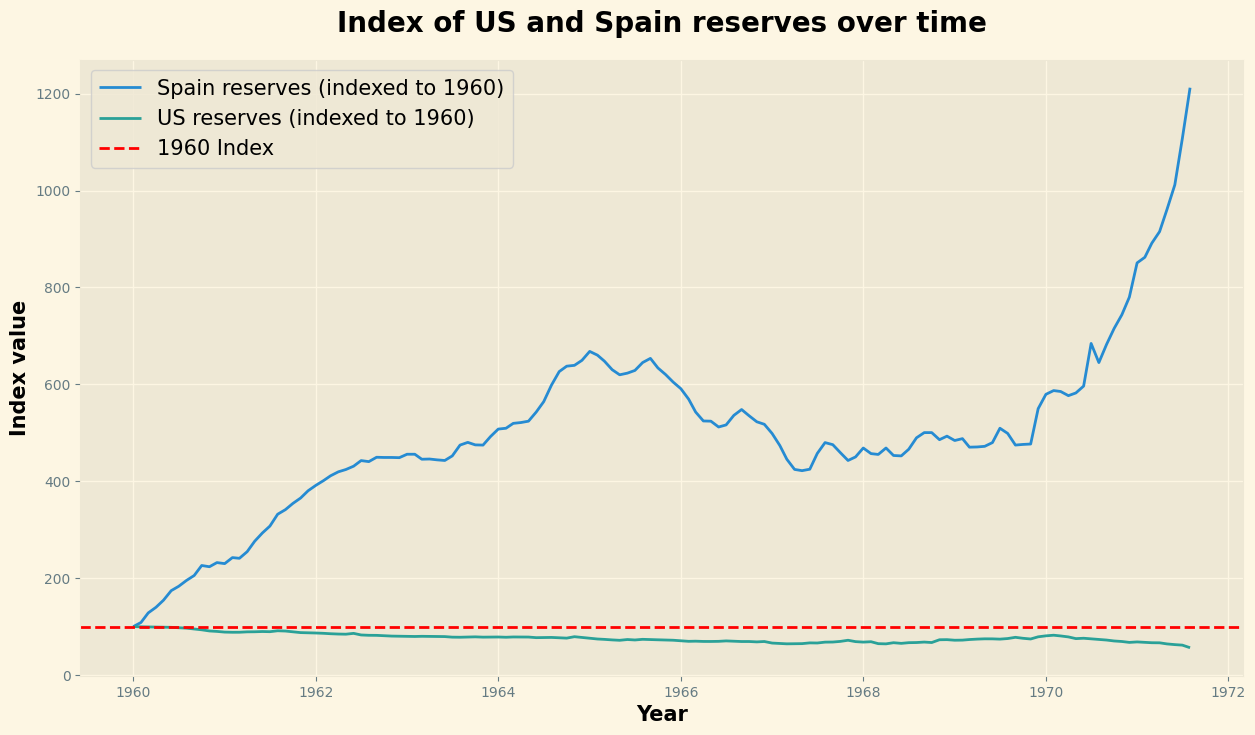

In [23]:
plt.figure(figsize = (15, 8))
plt.plot(df[df['date'] <= bw_year]['date'], 
         df[df['date'] <= bw_year]['spain_reserves_index_1960'], 
         label='Spain reserves (indexed to 1960)')
plt.plot(df[df['date'] <= bw_year]['date'], 
         df[df['date'] <= bw_year]['us_reserves_index_1960'], 
         label='US reserves (indexed to 1960)')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('Index value', fontsize=15, weight='bold', color='black')
plt.axhline(y=100, color='red', linestyle='--', label='1960 Index')
plt.title("Index of US and Spain reserves over time", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

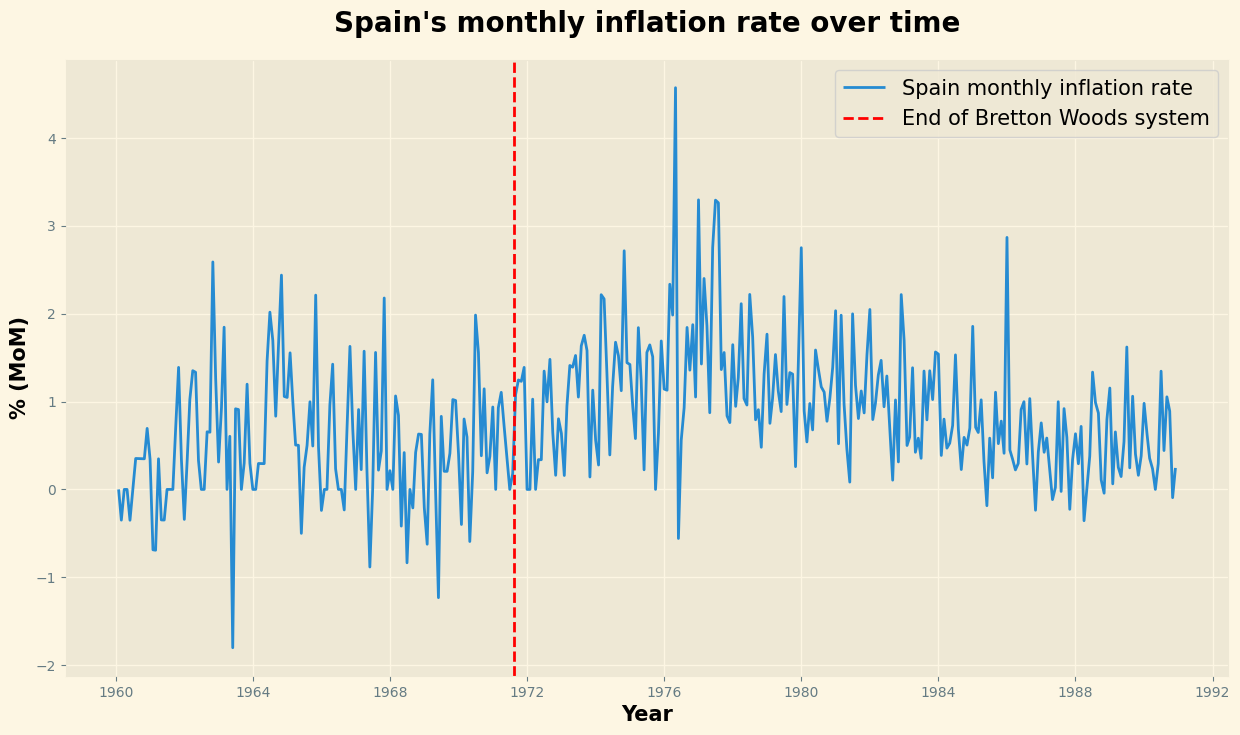

In [24]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_inflation_rate'], label='Spain monthly inflation rate')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('% (MoM)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Spain's monthly inflation rate over time", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

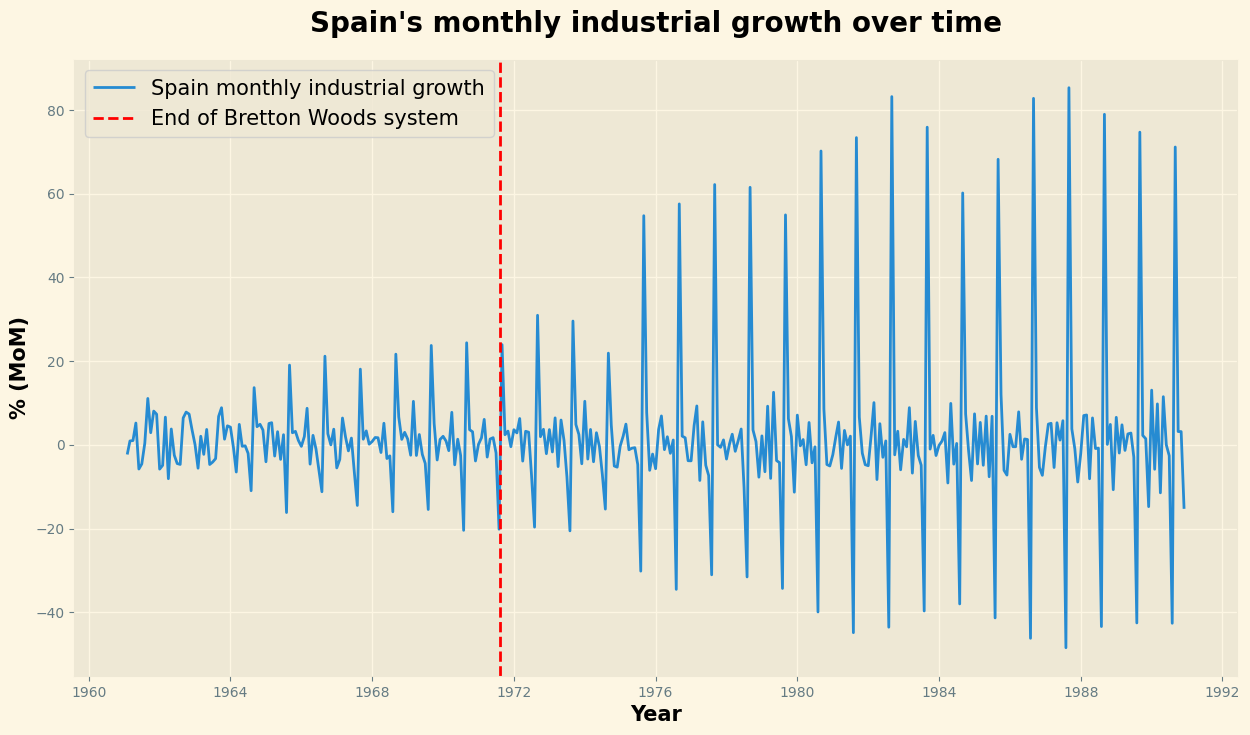

In [25]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_industrial_growth'], label='Spain monthly industrial growth')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('% (MoM)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Spain's monthly industrial growth over time", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

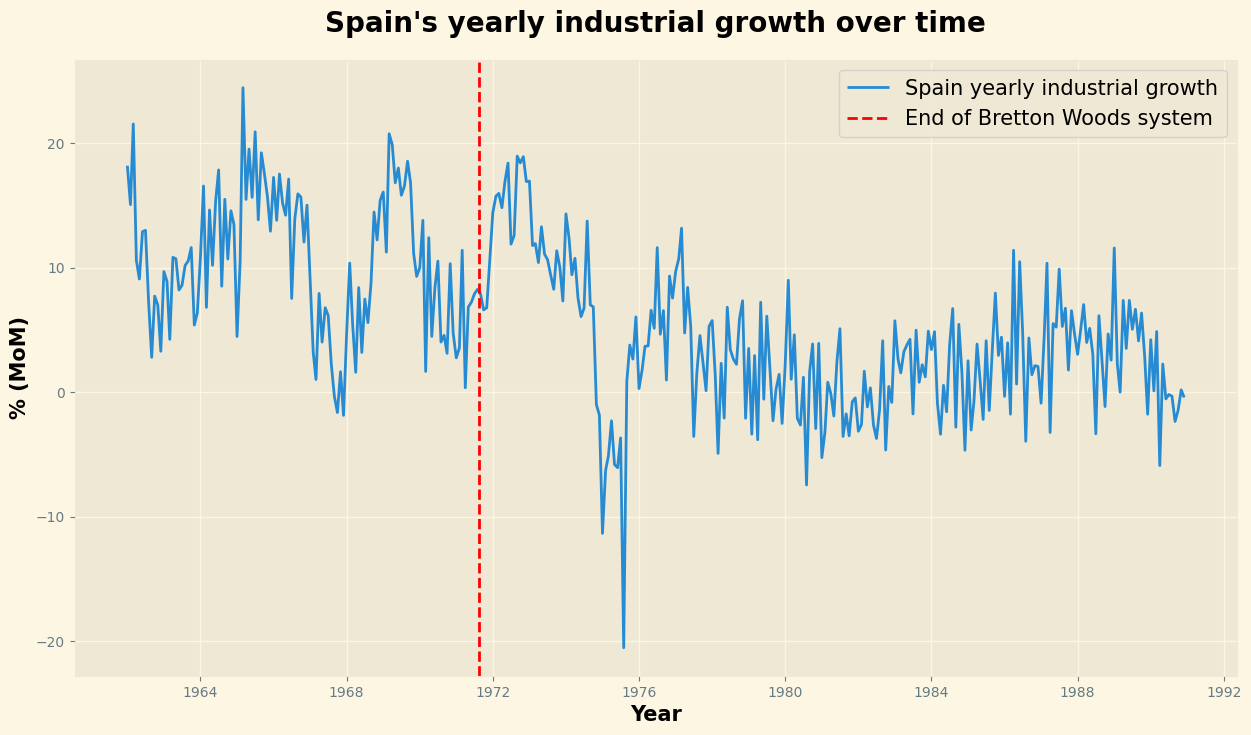

In [26]:
plt.figure(figsize = (15, 8))
plt.plot(df['date'], df['spain_industrial_yearly_growth'], label='Spain yearly industrial growth')
plt.xlabel('Year', fontsize=15, weight='bold', color='black')
plt.ylabel('% (MoM)', fontsize=15, weight='bold', color='black')
plt.axvline(x=bw_year, color='red', linestyle='--', label='End of Bretton Woods system')
plt.title("Spain's yearly industrial growth over time", fontsize=20, weight='bold', pad=20)
plt.legend(fontsize=15)
plt.style.use('Solarize_Light2')

# 📑 **Statistical Analysis**

### ✅ **Coverage: 5.3.3**

We first add an extra column in our dataframe – difference between US and Spain inflation rate defined as such:

In [27]:
df['us_minus_spain_inflation'] = df['us_inflation_rate'] - df['spain_inflation_rate']

We separate our dataframe into _before_ and _after_ the Bretton Woods system, with dates adjusted:

In [28]:
df_before = df[df['date'] <= pd.to_datetime('1971-07-01')]
df_after = df[df['date'] >= pd.to_datetime('1973-01-01')]

Finally, we calculate the standard deviations using `std()` in `pandas`.

In [29]:
# Identify the factors that we want to calculate standard deviation
std_factors = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_inflation_rate', 'us_minus_spain_inflation', 'spain_industrial_yearly_growth']

# Create an empty dictionary (to be converted to tabular format later on)
std_values = {'before': {}, 'after': {}}

# Initiate loops to calculate each factor in each dataframe
for dataframe in [df_before, df_after]:
    for factor in std_factors:
        factor_std = dataframe[factor].std()
        std_values['before' if dataframe is df_before else 'after'][factor] = factor_std  # Store values accordingly

# Convert std_values dictionary to dataFrame
std_df = pd.DataFrame(std_values)
std_df['ratio (after/before)'] = std_df['after'] / std_df['before']
std_df = std_df.round(2) # Round to two decimal places

# Print the values
print("Standard deviations:")
print(std_df)

Standard deviations:
                                    before  after  ratio (after/before)
spain_nominal_exchange_rate_growth    1.42   2.58                  1.82
spain_real_exchange_rate_growth       1.48   2.53                  1.72
spain_inflation_rate                  0.73   0.74                  1.02
us_minus_spain_inflation              0.79   0.75                  0.95
spain_industrial_yearly_growth        5.69   5.05                  0.89


---

### 🌟 **Why might it be a good idea to exclude data from 08/1971 to 12/1972 for the above calculations?**

Excluding data from August 1971 to December 1972 for the calculations above could be justified for the following reasons:
- The period immediately following the departure from the Bretton Woods system was characterised by significant economic and policy changes as countries adjusted to the new monetary regime. These policy measures could distort the relationship between exchange rate fluctuations and macroeconomic variables during this period, making it challenging to draw clear conclusions.
- Economic data for the immediate aftermath of the Bretton Woods collapse may be less reliable or subject to revisions due to the rapid changes in economic conditions and reporting mechanism. Excluding this period reduces the risk of relying on potentially inaccurate or incomplete data.
- By excluding the initial transition period, analysts can focus on studying the longer-term effects of exchange rate fluctuations on the macroeconomy. This allows for a clearer understanding of the sustained impacts of exchange rate policies.


# 🌚 **Conclusion**

### ✅ **Coverage: 5.4**

---

### 🌟 **Taken together, what do your results imply about the effect of real exchange rate fluctuations? Is there a reason why your results are particularly compelling?**

The standard deviation of both the monthly growth of the nominal and real exchange rates of the Spanish peseta were respectively 82% and 71% higher post the departure from the Bretton Woods system, indicating that real exchange rates were significantly more volatile post-Bretton Woods. However, the standard deviation between the inflation rate in Spain, the difference between the inflation in Spain and the U.S. and 12-monthly industrial production growth were not significantly different from the period before departing from the Bretton Woods system. This implies that fluctuations in the real exchange rate might not have a significant effect on a country’s economy.

---

### 🌟 **It is perhaps more natural to consider changes in levels rather than changes in volatility. Is there evidence that the average level of nominal and/or real exchange rates changed markedly post-Bretton Woods? What about the average levels of inflation and production?**

The graph for nominal exchange rates disproportionately demonstrates changes in levels post-exit from the Bretton Woods system as member nations shift from fixed to free-floating exchange rates. 

# ^^Finished?? :shock:

---

### 🌟 **What could be some pitfalls of using this to infer causal changes in the level of industrial production or inflation due to exchange rate differences?**

- Historical data may suffer from lack of accuracy. For example, the sudden spike in 1968 in our graphs may be due to measurement issues.
- Other variables also contributed to changing the level of industrial production/ inflation, hence not all of the changes can be attributed to exchange rate differences. For example, the oil shocks of the late 1970s led to significant cost-push inflation in Spain. 
- Reverse causality – Changes in industrial production or inflation could also cause exchange rate movements. For example, if a country faces inflationary pressures, the country’s central bank may want to depreciate its currency. Hence, the depreciation of the currency could be a response to inflationary pressures rather than a cause, as higher inflation leads to a weaker currency to preserve export competitiveness.
